# LAVA Data Value
## For Mislabeled Data Detection (CIFAR-10)

In [1]:
import lava

c:\Users\21520\anaconda3\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\21520\PycharmProjects\LAVA\LAVA\otdd\pytorch\utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import torch
import torchvision
# print(torch.__version__)
# print(torchvision.__version__)
# print(torch.version.cuda)
# print(torch.cuda.is_available())

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.autograd import Variable

import matplotlib.pyplot as plt
from torch import tensor
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from copy import deepcopy as dpcp

from torch.utils.data import Dataset, TensorDataset, DataLoader

In [ ]:
! nvidia-smi

In [3]:
cuda_num = 0
import torchvision
print(torchvision.__version__)
import torch
print(torch.__version__)
import os
os.environ["CUDA_VISIBLE_DEVICES"]=str(cuda_num)
print(os.environ["CUDA_VISIBLE_DEVICES"])
torch.cuda.set_device(cuda_num)
print("Cuda device: ", torch.cuda.current_device())
print("cude devices: ", torch.cuda.device_count())
device = torch.device('cuda:' + str(cuda_num) if torch.cuda.is_available() else 'cpu')

0.18.0
2.3.0
0
Cuda device:  0
cude devices:  1


### Set Parameters

In [4]:
training_size = 50
valid_size = 10
resize = 32
portion = 0.25

### Loading Corrupted Data into DataLoaders
### Train and Test Loaders with Indices of Corrupted Data

In [30]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='CIFAR10', resize=resize,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

Files already downloaded and verified
Files already downloaded and verified
CIFAR TEN


### Load Feature Extractor for a Given Dataset
### Checkpoints provided and training files provided

In [12]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
feature_extractor = lava.load_pretrained_feature_extractor('cifar10_embedder_preact_resnet18.pth', device)

In [31]:
import pickle
with open("save_x1y1x2y2.txt", "rb") as f:
    loaded_data = pickle.load(f)
X1, Y1, X2, Y2 = loaded_data

# Now you can use X1, Y1, X2, and Y2 in your code
print(X1.shape)  # Example usage

torch.Size([50, 3072])


In [32]:
print(X1.shape)
print(X2.shape)
print(Y1.shape)
print(Y2.shape)

torch.Size([50, 3072])
torch.Size([5, 3072])
torch.Size([50])
torch.Size([5])


In [33]:
c1 = torch.unique(Y1)
c2 = torch.unique(Y2)
n1, n2 = len(c1), len(c2)
print(n1, n2)

10 2


In [34]:
print(Y1)

tensor([2, 2, 9, 7, 8, 4, 7, 7, 2, 9, 1, 4, 8, 5, 6, 7, 8, 5, 0, 3, 9, 0, 5, 6,
        1, 3, 6, 0, 3, 5, 1, 7, 6, 3, 2, 0, 6, 5, 7, 1, 9, 0, 2, 0, 5, 8, 1, 6,
        1, 6])


In [35]:
print(Y2)

tensor([11, 10, 10, 10, 11])


### Compute Dual Solution of Optimal Transport Problem

In [36]:
dual_sol, trained_with_flag = lava.compute_dual(feature_extractor, loaders['train'], loaders['test'], 
                                                training_size, shuffle_ind, resize=resize)

  0%|          | 0/1 [00:00<?, ?it/s]

load full dataset: torch.Size([50])


  0%|          | 0/1 [00:00<?, ?it/s]

load full dataset: torch.Size([5])
10 10
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\21520\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\21520\AppData\Local\Temp\ipykernel_20940\2284749519.py", line 1, in <module>
    dual_sol, trained_with_flag = lava.compute_dual(feature_extractor, loaders['train'], loaders['test'],
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\21520\PycharmProjects\LAVA\LAVA\lava.py", line 166, in compute_dual
    dual_sol = get_OT_dual_sol(feature_extractor, trainloader, testloader, p=2, resize=32, device=device)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\21520\PycharmProjects\LAVA\LAVA\lava.py", line 114, in get_OT_dual_sol
    dual_sol = dist.dual_sol(maxsamples = training_size, return_coupling = True)
               ^^^^^^^^^^^^^^^^

### Compute the Data Values from Calibrated Gradient
### Visualize Detection Rate Based on LAVA

inspected: 10, found: 10 detection rate: 0.00 baseline: 1.8
inspected: 20, found: 20 detection rate: 0.00 baseline: 3.6
inspected: 30, found: 30 detection rate: 0.00 baseline: 5.4
inspected: 40, found: 40 detection rate: 0.00 baseline: 7.2
inspected: 50, found: 50 detection rate: 0.01 baseline: 9.0
inspected: 60, found: 60 detection rate: 0.01 baseline: 10.8
inspected: 70, found: 70 detection rate: 0.01 baseline: 12.6
inspected: 80, found: 80 detection rate: 0.01 baseline: 14.4
inspected: 90, found: 90 detection rate: 0.01 baseline: 16.2
inspected: 100, found: 100 detection rate: 0.01 baseline: 18.0
inspected: 110, found: 110 detection rate: 0.01 baseline: 19.8
inspected: 120, found: 120 detection rate: 0.01 baseline: 21.6
inspected: 130, found: 130 detection rate: 0.01 baseline: 23.400000000000002
inspected: 140, found: 140 detection rate: 0.01 baseline: 25.2
inspected: 150, found: 150 detection rate: 0.01 baseline: 27.0
inspected: 160, found: 160 detection rate: 0.02 baseline: 28.8
i

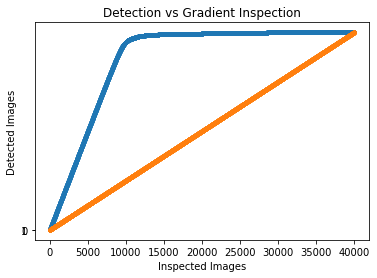

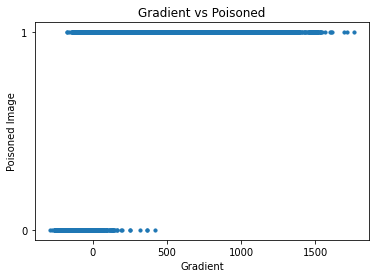

Number of poisoned images:  10000  out of 10000.
last index of poison 35275


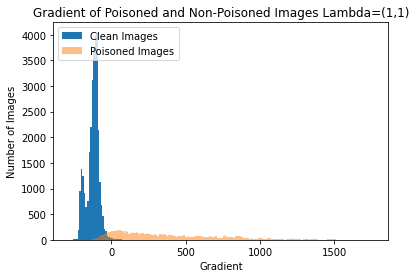

In [9]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)

In [10]:
calibrated_gradient

[1760.8445,
 1711.2532,
 1695.4175,
 1610.2479,
 1607.1549,
 1595.6134,
 1565.5303,
 1541.2612,
 1536.2543,
 1532.9617,
 1531.9221,
 1531.4606,
 1531.1067,
 1520.5334,
 1519.1776,
 1514.936,
 1510.6559,
 1508.984,
 1508.4443,
 1508.3225,
 1507.6145,
 1507.4087,
 1506.1387,
 1506.0825,
 1505.9579,
 1505.8258,
 1505.611,
 1505.4696,
 1503.0316,
 1502.037,
 1501.7511,
 1499.8995,
 1499.0443,
 1498.6959,
 1495.9205,
 1494.7053,
 1494.0863,
 1493.4296,
 1492.1981,
 1492.1196,
 1491.4706,
 1491.26,
 1490.7554,
 1490.0614,
 1489.7915,
 1489.5223,
 1487.3123,
 1485.79,
 1485.4828,
 1485.435,
 1485.0864,
 1485.0663,
 1481.5033,
 1479.6412,
 1478.488,
 1478.3394,
 1475.9414,
 1475.2765,
 1474.0159,
 1473.5983,
 1472.7838,
 1471.9462,
 1471.6104,
 1469.1716,
 1468.8197,
 1468.5944,
 1467.2744,
 1465.4305,
 1465.1786,
 1463.7997,
 1463.4319,
 1462.9943,
 1462.304,
 1461.2032,
 1460.7394,
 1458.55,
 1457.2844,
 1454.6569,
 1454.6523,
 1446.8884,
 1445.7305,
 1437.895,
 1431.1599,
 1426.7028,
 1424.

In [19]:
ktr = None

In [20]:
for batch in loaders['train']:
    print(batch[0][0].size())
    ktr = batch[0][0]
    break

torch.Size([3, 32, 32])


In [21]:
!pip install pillow

In [22]:
import torch
from PIL import Image
import numpy as np

In [26]:
np_array = ktr.numpy()
np_array = np.transpose(np_array, (1, 2, 0))
image = Image.fromarray(np.uint8(np_array * 255))
image.save('output_image.png')
image.show()

In [ ]:
print(np_array.shape)

In [ ]:
    def __call__(self, X1, X2):
        print(1)
        _orig_device = X1.device
        device = process_device_arg(self.device)
        #print("Device call: ", device)
        #print("Self Device call: ", self.device)
        if self.src_emb is not None:
            B1, N1, D1 = self._get_batch_shape(X1)
            print(self.src_emb)
            print(B1, N1, D1)
            print(X1.shape)
            #try:
            self.src_emb.to(device)
            print(1)
            #X1 = self.src_emb(X1.view(-1,*self.src_dim)).reshape(B2, N2, -1)
            X1 = X1.view(1, 50, 1, 1024)  # Reshape with dummy channel
            flattened_X1 = self.src_emb(X1.view(-1,*self.src_dim)).reshape(B1, N1, -1)
            print(flattened_X1.shape)
            #X1 = self.src_emb(X1.view(-1,*self.src_dim).to(self.device)).reshape(B1, N1, -1)
            #except: # Memory error?
                #print('Batchifying feature distance computation')
                #X1 = self._batchify_computation(X1.view(-1,*self.src_dim).to(self.device), 'x').reshape(B1, N1, -1)
        if self.tgt_emb is not None:
            B2, N2, D2 = self._get_batch_shape(X2)
            X2 = self.tgt_emb(X2.view(-1,*self.tgt_dim))
            print(X2)
            #try:
            #X2 = self.tgt_emb(X2.view(-1,*self.tgt_dim).to(self.device)).reshape(B2, N2, -1)
            #except:
            #    print('Batchifying feature distance computation')
            #    X2 = self._batchify_computation(X2.view(-1,*self.tgt_dim).to(self.device), 'y').reshape(B2, N2, -1)
        if self.p == 1:
            print(1)
            print(X1.shape, X2.shape)
            c = geomloss.utils.distances(X1, X2)
        elif self.p == 2:
            print(1)
            print(X1.shape, X2.shape)
            c = geomloss.utils.squared_distances(X1, X2) / 2
        #else:
        #    raise ValueError()
        return c.to(_orig_device)